#Group Details:   
Om Shinde - 202402040015    
Pawan Shinde - 202402040012   
Hari Sharma - 202402040013

#Topic: Customer Retention and Purchase Behavior Analysis in Online Retail Dataset

##Importing basic imports required

In [26]:
# -----------------------
# Data Manipulation
# -----------------------
import pandas as pd
import numpy as np

# -----------------------
# Visualization
# -----------------------
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")  # seaborn style

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import gaussian_kde

# -----------------------
# Preprocessing & Encoding
# -----------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# -----------------------
# Base Models
# -----------------------
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# -----------------------
# Ensemble Models
# -----------------------
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier, StackingClassifier

# -----------------------
# Metrics & Evaluation
# -----------------------
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_curve, auc, confusion_matrix, classification_report
)


##Loading the dataset

In [30]:
import pandas as pd

# CSV export link
csv_url = "https://docs.google.com/spreadsheets/d/1mAotSYK8yMOcxzKrUMJfE08obBGuN0pz03vlZgUbyqk/export?format=csv"

# Load dataset
df = pd.read_csv(csv_url)

print("Dataset Loaded:", df.shape)
df.head()


Dataset Loaded: (541909, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2023-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2023-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2023-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2023-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2023-12-01 08:26:00,3.39,17850.0,United Kingdom


#Data Cleaning and Feature Engineering for Dataset

This code cleans the dataset by removing invalid entries, converting dates, filtering cancelled orders, and creating a total price feature.

In [7]:
print("Original DataFrame shape:", df.shape)

# 1. Identify and remove rows where the 'CustomerID' is missing
df.dropna(subset=['CustomerID'], inplace=True)
print("Shape after dropping rows with missing CustomerID:", df.shape)

# 2. Convert the 'InvoiceDate' column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("InvoiceDate column converted to datetime.")

# 3. Filter out cancelled orders by keeping only the rows where the 'Quantity' is greater than 0
df = df[df['Quantity'] > 0]
print("Shape after filtering out cancelled orders:", df.shape)

# 4. Calculate the 'TotalPrice' for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("TotalPrice column created.")

df.head()

Original DataFrame shape: (541909, 8)
Shape after dropping rows with missing CustomerID: (406829, 8)
InvoiceDate column converted to datetime.
Shape after filtering out cancelled orders: (397924, 8)
TotalPrice column created.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#Customer-Level Feature Engineering and Target Creation

This code cleans transaction data, aggregates customer behavior, computes recency, and creates a repeat-customer target variable

In [ ]:
import pandas as pd

# Reload dataset (to ensure df is defined after kernel reset or if previous cell wasn't run)
sheet_url = "https://docs.google.com/spreadsheets/d/1mAotSYK8yMOcxzKrUMJfE08obBGuN0pz03vlZgUbyqk/export?format=csv"
df = pd.read_csv(sheet_url)

print("Original DataFrame shape:", df.shape)

# 1. Identify and remove rows where the 'CustomerID' is missing
df.dropna(subset=['CustomerID'], inplace=True)
df['CustomerID'] = df['CustomerID'].astype(int) # Convert CustomerID to integer
print("Shape after dropping rows with missing CustomerID:", df.shape)

# 2. Convert the 'InvoiceDate' column to datetime objects
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("InvoiceDate column converted to datetime.")

# 3. Filter out cancelled orders by keeping only the rows where the 'Quantity' is greater than 0
df = df[df['Quantity'] > 0]
print("Shape after filtering out cancelled orders:", df.shape)

# 4. Calculate the 'TotalPrice' for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
print("TotalPrice column created.")

# 5. Group the DataFrame by 'CustomerID' and calculate aggregated features
customer_data = df.groupby('CustomerID').agg(
    TotalSpending=('TotalPrice', 'sum'),
    NumUniqueItems=('StockCode', lambda x: x.nunique()),
    NumOrders=('InvoiceNo', lambda x: x.nunique()),
    LastPurchaseDate=('InvoiceDate', 'max')
).reset_index()
print("Aggregated customer-level features created.")

# 6. Determine the most recent 'InvoiceDate' across the entire dataset
most_recent_overall_purchase_date = df['InvoiceDate'].max()

# 7. Calculate 'Recency' for each customer
customer_data['Recency'] = (most_recent_overall_purchase_date - customer_data['LastPurchaseDate']).dt.days
print("Recency feature calculated.")

# 8. Create the target variable 'IsRepeatCustomer'
customer_data['IsRepeatCustomer'] = (customer_data['NumOrders'] > 1).astype(int) # 1 for repeat, 0 for not
print("IsRepeatCustomer target variable created.")

print("\nCleaned and aggregated customer data head:")
print(customer_data.head())

Original DataFrame shape: (541909, 8)
Shape after dropping rows with missing CustomerID: (406829, 8)
InvoiceDate column converted to datetime.
Shape after filtering out cancelled orders: (397924, 8)
TotalPrice column created.
Aggregated customer-level features created.
Recency feature calculated.
IsRepeatCustomer target variable created.

Cleaned and aggregated customer data head:
   CustomerID  TotalSpending  NumUniqueItems  NumOrders    LastPurchaseDate  \
0       12346       77183.60               1          1 2011-01-18 10:01:00   
1       12347        4310.00             103          7 2011-12-07 15:52:00   
2       12348        1797.24              22          4 2011-09-25 13:13:00   
3       12349        1757.55              73          1 2011-11-21 09:51:00   
4       12350         334.40              17          1 2011-02-02 16:01:00   

   Recency  IsRepeatCustomer  
0      325                 0  
1        1                 1  
2       74                 1  
3       18       

#Visualization and Analysis of Repeat Customer Distribution

This code visualizes and computes the distribution of repeat vs non-repeat customers.

In [9]:
# Get counts for 0 and 1 in correct order
repeat_counts = customer_data['IsRepeatCustomer'].value_counts().sort_index()

# Create interactive bar chart
fig = px.bar(
    x=[0, 1],                       # Force axis to show only 0 and 1
    y=[repeat_counts.get(0, 0), repeat_counts.get(1, 0)],
    labels={
        'x': 'IsRepeatCustomer (0 = Not Repeat, 1 = Repeat)',
        'y': 'Number of Customers'
    },
    title='Distribution of IsRepeatCustomer'
)

# Add hover info
fig.update_traces(
    hovertemplate='Category: %{x}<br>Count: %{y}'
)

# Make sure x-axis displays only 0 and 1
fig.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['0', '1'])

fig.show()

# Normalized distribution
repeat_customer_counts = customer_data['IsRepeatCustomer'].value_counts(normalize=True)
print("Distribution of IsRepeatCustomer:")
print(repeat_customer_counts)


Distribution of IsRepeatCustomer:
IsRepeatCustomer
1    0.655681
0    0.344319
Name: proportion, dtype: float64


#Exploratory Analysis of Numerical Customer Features

This code visualizes the distributions of key numerical features to understand customer behavior patterns.

In [11]:
numerical_features = ['TotalSpending', 'NumUniqueItems', 'NumOrders', 'Recency']

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"Distribution of {f}" for f in numerical_features]
)

row, col = 1, 1
for feature in numerical_features:
    values = customer_data[feature].dropna()

    # Histogram
    counts, bins = np.histogram(values, bins=30)
    centers = (bins[:-1] + bins[1:]) / 2

    fig.add_trace(
        go.Bar(
            x=centers,
            y=counts,
            name=feature,
            hovertemplate="x = %{x:.2f}<br>count = %{y}<extra></extra>"
        ),
        row=row, col=col
    )

    # KDE curve
    kde = gaussian_kde(values)
    xs = np.linspace(values.min(), values.max(), 200)
    kde_scaled = kde(xs) * (len(values) * (bins[1] - bins[0]))

    fig.add_trace(
        go.Scatter(
            x=xs,
            y=kde_scaled,
            mode="lines",
            hovertemplate="x = %{x:.2f}<br>density = %{y:.4f}<extra></extra>"
        ),
        row=row, col=col
    )

    # ADD AXIS TITLES FOR EACH SUBPLOT
    fig.update_xaxes(title_text=feature, row=row, col=col)
    fig.update_yaxes(title_text="Frequency", row=row, col=col)

    # Move to next subplot
    col += 1
    if col == 3:
        col = 1
        row += 1

fig.update_layout(height=800, width=1000, showlegend=False)
fig.show()


#Monthly Sales Trend Analysis

This code resamples transaction data monthly and visualizes total sales over time to observe revenue trends.

In [12]:
# Prepare data
df_sales_trend = df.set_index('InvoiceDate').resample('M')['TotalPrice'].sum().reset_index()

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_sales_trend['InvoiceDate'],
        y=df_sales_trend['TotalPrice'],
        mode='lines+markers',
        line=dict(width=2),
        hovertemplate="Date: %{x|%Y-%m-%d}<br>Sales: %{y:.2f}<extra></extra>"
    )
)

fig.update_layout(
    title='Monthly Sales Trend Over Time',
    xaxis_title='Date',
    yaxis_title='Total Sales',
    width=1000,
    height=500
)

fig.show()


/tmp/ipython-input-1890938042.py:2: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



#Top-Selling Products Analysis

This code identifies the ten highest-selling products and visualizes them based on total quantity sold.



In [13]:
 # Prepare data
top_selling_products = (
    df.groupby('Description')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

# Create interactive vertical bar chart
fig = px.bar(
    x=top_selling_products.index,      # Product names on X
    y=top_selling_products.values,     # Quantity on Y
    labels={'x': 'Product', 'y': 'Total Quantity Sold'},
    title='Top 10 Selling Products by Quantity'
)

# Show exact value on hover
fig.update_traces(hovertemplate='Product: %{x}<br>Quantity: %{y}')

# Display
fig.show()


#Top Spending Customers Visualization

This code identifies the highest-spending customers and visualizes their total spending using a formatted bar chart.

In [14]:
# Sort and select top 10 customers
top_spending_customers = customer_data.sort_values(
    by='TotalSpending',
    ascending=False
).head(10)

# Plotly bar chart
fig = px.bar(
    top_spending_customers,
    x='CustomerID',           # x-axis shows only IDs
    y='TotalSpending',
    # text='TotalSpending',     # optional: show value on top of bar
    labels={'TotalSpending': 'Total Spending (in Currency)', 'CustomerID': 'Customer ID'},
    title='Top 10 Customers by Total Spending',
    color='TotalSpending',    # optional gradient
    color_continuous_scale='viridis'
)

# Hover template
fig.update_traces(
    hovertemplate='Customer ID: %{x}<br>Total Spending: %{y}<extra></extra>'
)

# Layout tweaks
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis={'type':'category'}  # ensures IDs treated as discrete categories
)

fig.show()


#Feature Comparison Between Repeat and Non-Repeat Customers

This code uses boxplots to compare key numerical features across repeat and non-repeat customer groups.



In [15]:
numerical_features = ['TotalSpending', 'NumUniqueItems', 'NumOrders', 'Recency']

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[f"{f} by IsRepeatCustomer" for f in numerical_features]
)

row, col = 1, 1
for feature in numerical_features:
    # Boxplot for IsRepeatCustomer=0
    fig.add_trace(
        go.Box(
            y=customer_data[customer_data['IsRepeatCustomer'] == 0][feature],
            name='0',
            boxmean=True,
            hovertemplate=f'{feature}: %{{y:.2f}}<extra></extra>'
        ),
        row=row, col=col
    )
    # Boxplot for IsRepeatCustomer=1
    fig.add_trace(
        go.Box(
            y=customer_data[customer_data['IsRepeatCustomer'] == 1][feature],
            name='1',
            boxmean=True,
            hovertemplate=f'{feature}: %{{y:.2f}}<extra></extra>'
        ),
        row=row, col=col
    )

    col += 1
    if col == 3:
        col = 1
        row += 1

fig.update_layout(
    height=900,
    width=1000,
    showlegend=False,
    xaxis_title='IsRepeatCustomer (0: Not Repeat, 1: Repeat)',
    yaxis_title='Value'
)
fig.show()


#Integrating Customer Country Information

This code extracts each customer's country from the transaction data and merges it into the customer-level dataset.

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Extract 'Country' for each unique 'CustomerID' from the original 'df' DataFrame
customer_country = df.groupby('CustomerID')['Country'].first().reset_index()

# 2. Merge this 'Country' information into the 'customer_data' DataFrame
customer_data = pd.merge(customer_data, customer_country, on='CustomerID', how='left')

print("Customer_data head with Country:")
print(customer_data.head())

Customer_data head with Country:
   CustomerID  TotalSpending  NumUniqueItems  NumOrders    LastPurchaseDate  \
0       12346       77183.60               1          1 2011-01-18 10:01:00   
1       12347        4310.00             103          7 2011-12-07 15:52:00   
2       12348        1797.24              22          4 2011-09-25 13:13:00   
3       12349        1757.55              73          1 2011-11-21 09:51:00   
4       12350         334.40              17          1 2011-02-02 16:01:00   

   Recency  IsRepeatCustomer         Country  
0      325                 0  United Kingdom  
1        1                 1         Iceland  
2       74                 1         Finland  
3       18                 0           Italy  
4      309                 0          Norway  


#Encoding Country as a Numerical Feature

This code converts the categorical country information into numeric labels using Label Encoding.

In [17]:
label_encoder = LabelEncoder()
customer_data['Country_Encoded'] = label_encoder.fit_transform(customer_data['Country'])

print("Country column encoded. Head of customer_data with new column:")
print(customer_data[['Country', 'Country_Encoded']].head())

Country column encoded. Head of customer_data with new column:
          Country  Country_Encoded
0  United Kingdom               35
1         Iceland               16
2         Finland               12
3           Italy               18
4          Norway               24


#Preparing Feature Set and Target Variable for Modeling

This code selects numerical and encoded categorical features as predictors and defines the repeat-customer label as the target.

In [18]:
numerical_features = ['TotalSpending', 'NumUniqueItems', 'NumOrders', 'Recency']
encoded_categorical_features = ['Country_Encoded']

# 5. Define feature set X
X = customer_data[numerical_features + encoded_categorical_features]

# 6. Define target variable y
y = customer_data['IsRepeatCustomer']

print("Feature set X head:")
print(X.head())
print("\nTarget variable y head:")
print(y.head())

Feature set X head:
   TotalSpending  NumUniqueItems  NumOrders  Recency  Country_Encoded
0       77183.60               1          1      325               35
1        4310.00             103          7        1               16
2        1797.24              22          4       74               12
3        1757.55              73          1       18               18
4         334.40              17          1      309               24

Target variable y head:
0    0
1    1
2    1
3    0
4    0
Name: IsRepeatCustomer, dtype: int64


#Splitting Data into Training and Testing Sets

This code divides the feature set and target variable into training and testing subsets for model evaluation.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets.
X_train shape: (3471, 5)
X_test shape: (868, 5)
y_train shape: (3471,)
y_test shape: (868,)


#Scaling Numerical Features and Preparing Final Training/Test Sets

This code standardizes numerical features and combines them with encoded categorical features to create final model-ready datasets.

In [20]:
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_features])
X_test_scaled_numerical = scaler.transform(X_test[numerical_features])

X_train_scaled = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Combine scaled numerical features with the encoded categorical feature
X_train_scaled['Country_Encoded'] = X_train['Country_Encoded']
X_test_scaled['Country_Encoded'] = X_test['Country_Encoded']

print("Numerical features scaled and combined with encoded categorical features.")
print("X_train_scaled head:")
print(X_train_scaled.head())
print("\nX_test_scaled head:")
print(X_test_scaled.head())

Numerical features scaled and combined with encoded categorical features.
X_train_scaled head:
      TotalSpending  NumUniqueItems  NumOrders   Recency  Country_Encoded
227        0.068730        0.147501  -0.285760  1.205483               14
964        0.062043        0.986690  -0.027392 -0.764697               35
2045      -0.216996       -0.608951  -0.414944  1.476885               35
1025      -0.148106       -0.266184  -0.285760  0.441535               35
4241      -0.150089        0.466629  -0.285760 -0.794853               35

X_test_scaled head:
      TotalSpending  NumUniqueItems  NumOrders   Recency  Country_Encoded
3976      -0.217794       -0.561673  -0.414944 -0.392776               35
1448      -0.175505       -0.431658  -0.414944 -0.272152               35
2663      -0.114183       -0.147988  -0.285760 -0.754645               35
17        -0.085174        0.112042  -0.027392 -0.845113                3
1634       0.115360        0.596645  -0.027392  0.039458              

#Initializing and Training Multiple Machine Learning Models

This code initializes several classification algorithms and trains each model on the prepared training data.

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 1. Initialize base models
log_reg = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear for smaller datasets/binary classification
dec_tree = DecisionTreeClassifier(random_state=42)
rand_forest = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
# SVC with probability=True for ensemble methods, might take longer to train
svc = SVC(probability=True, random_state=42)
adaboost = AdaBoostClassifier(random_state=42)

# Create a dictionary of models for easy iteration
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'Random Forest': rand_forest,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svc,
    'AdaBoost': adaboost
}

# 2. Train each base model
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained.")

print("All base models initialized and trained.")

Training Logistic Regression...
Logistic Regression trained.
Training Decision Tree...
Decision Tree trained.
Training Random Forest...
Random Forest trained.
Training K-Nearest Neighbors...
K-Nearest Neighbors trained.
Training Support Vector Machine...
Support Vector Machine trained.
Training AdaBoost...
AdaBoost trained.
All base models initialized and trained.


#Building and Training Ensemble Models (Voting & Stacking Classifiers)

This code constructs soft-voting and stacking ensemble models using multiple base learners and trains them for improved predictive performance.

In [22]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

# 3. Define a list of estimators for the VotingClassifier
voting_estimators = [
    ('lr', models['Logistic Regression']),
    ('dt', models['Decision Tree']),
    ('rf', models['Random Forest']),
    ('knn', models['K-Nearest Neighbors']),
    ('svc', models['Support Vector Machine']) # Include SVC since probability=True was set
]

# 4. Initialize and train the VotingClassifier
voting_clf = VotingClassifier(estimators=voting_estimators, voting='soft', n_jobs=-1) # Use 'soft' voting for probability predictions
print("Training VotingClassifier...")
voting_clf.fit(X_train_scaled, y_train)
print("VotingClassifier trained.")

# 5. Define base estimators for the StackingClassifier
# It's common to use different base models than the meta-learner
stacking_base_estimators = [
    ('lr', models['Logistic Regression']),
    ('dt', models['Decision Tree']),
    ('rf', models['Random Forest'])
]

# 6. Initialize and train the StackingClassifier
# Use Logistic Regression as the meta-estimator for simplicity
stacking_clf = StackingClassifier(
    estimators=stacking_base_estimators,
    final_estimator=models['Logistic Regression'], # Meta-learner
    cv=5, # Number of cross-validation folds for stacking
    n_jobs=-1 # Use all available cores
)
print("Training StackingClassifier...")
stacking_clf.fit(X_train_scaled, y_train)
print("StackingClassifier trained.")

print("Voting and Stacking Classifiers initialized and trained.")

Training VotingClassifier...
VotingClassifier trained.
Training StackingClassifier...
StackingClassifier trained.
Voting and Stacking Classifiers initialized and trained.


#Comprehensive Model Evaluation with Performance Metrics, Confusion Matrices, and ROC Curves

This code evaluates all trained models using multiple metrics, visualizes confusion matrices and ROC curves, and summarizes overall model performance.


Evaluating Logistic Regression...


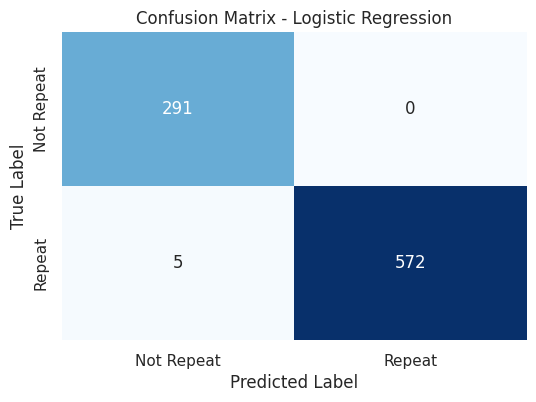

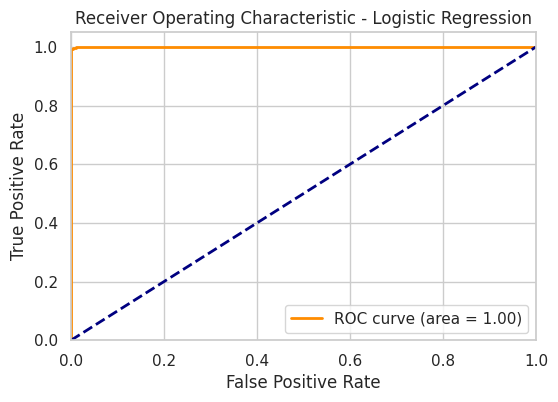


Evaluating Decision Tree...


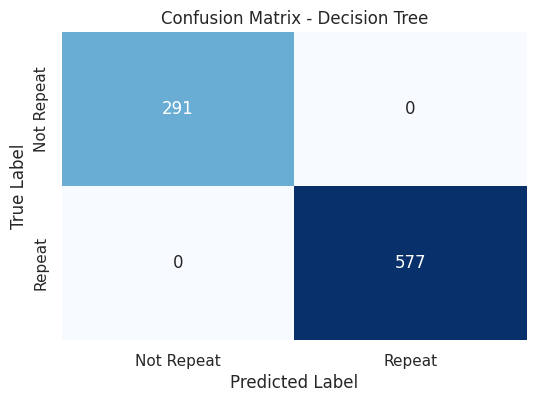

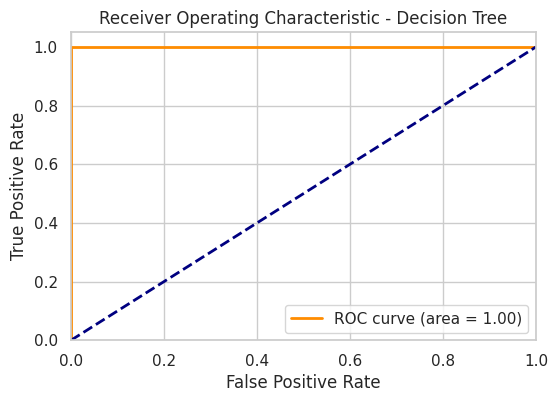


Evaluating Random Forest...


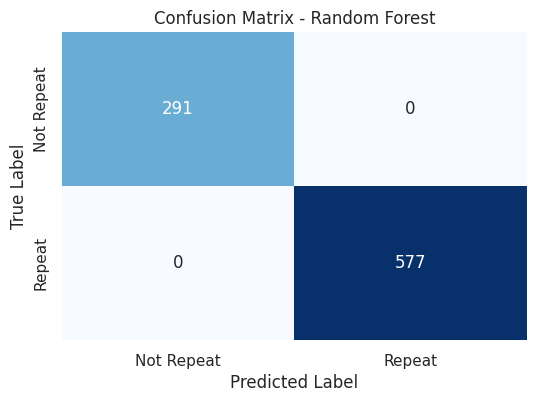

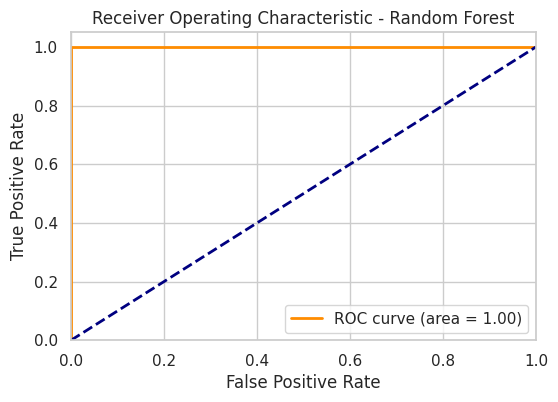


Evaluating K-Nearest Neighbors...


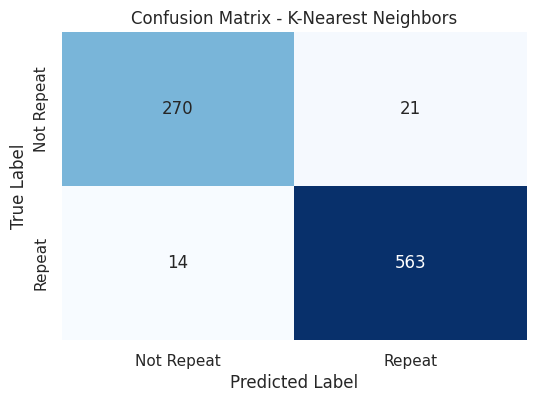

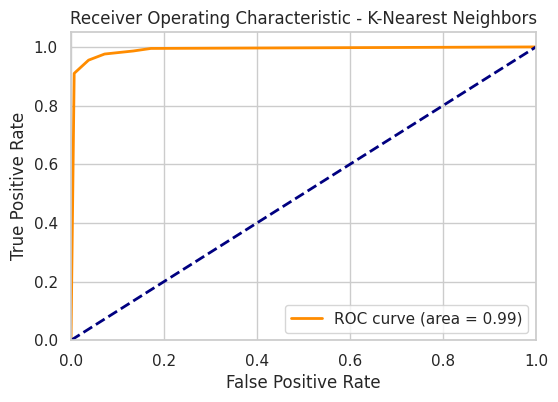


Evaluating Support Vector Machine...


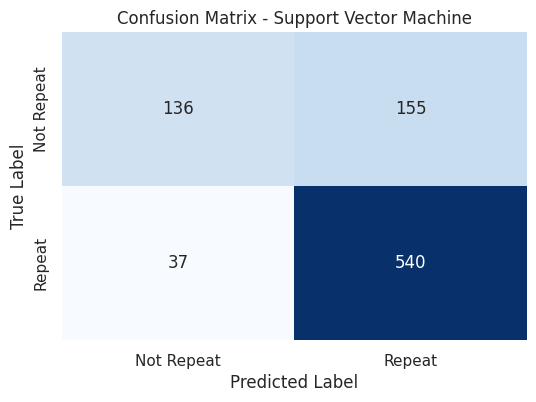

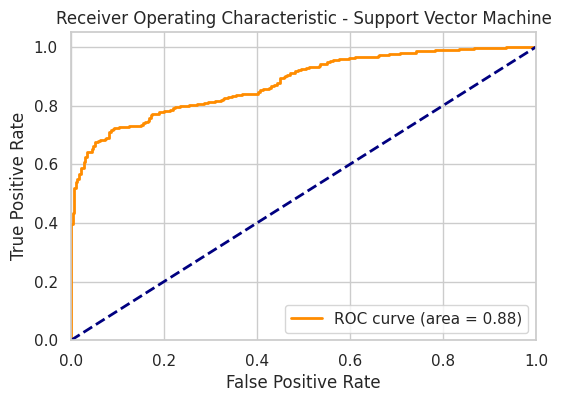


Evaluating AdaBoost...


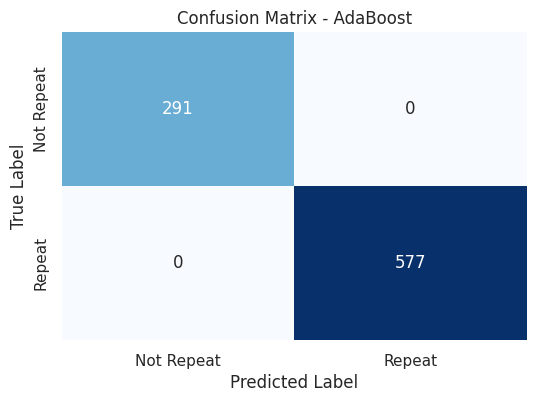

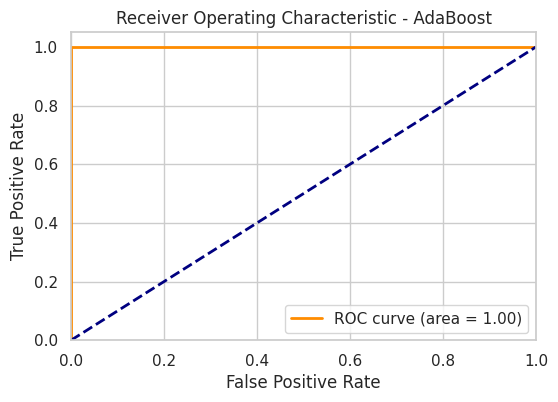


Evaluating Voting Classifier...


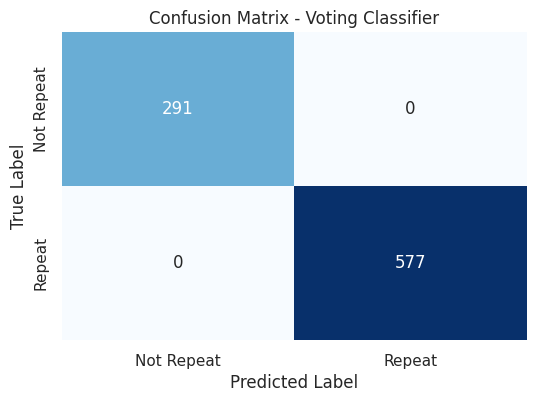

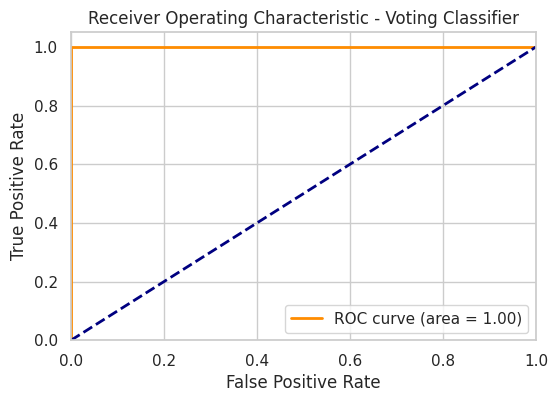


Evaluating Stacking Classifier...


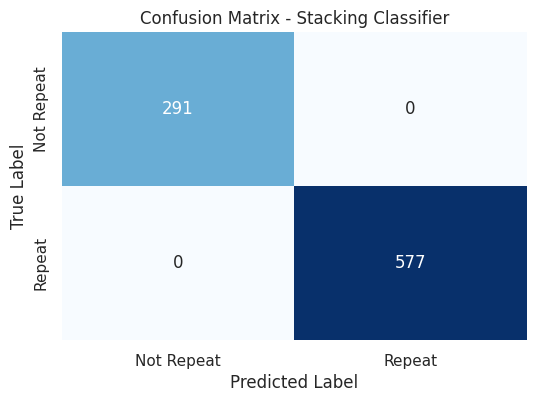

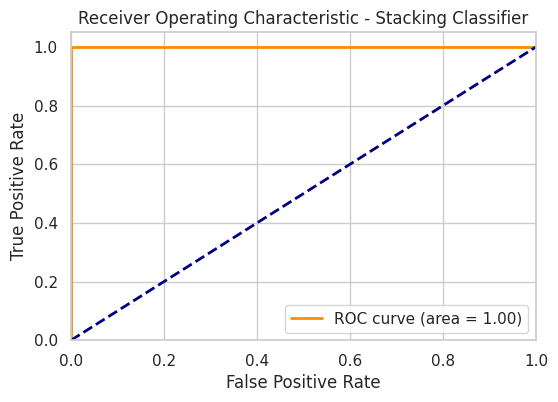


--- Model Performance Summary ---
                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0     Logistic Regression  0.994240   1.000000  0.991334  0.995648  0.999899
1           Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2           Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
3     K-Nearest Neighbors  0.959677   0.964041  0.975737  0.969854  0.989280
4  Support Vector Machine  0.778802   0.776978  0.935875  0.849057  0.877825
5                AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
6       Voting Classifier  1.000000   1.000000  1.000000  1.000000  1.000000
7     Stacking Classifier  1.000000   1.000000  1.000000  1.000000  1.000000


In [23]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Create a dictionary that includes all trained models
all_models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dec_tree,
    'Random Forest': rand_forest,
    'K-Nearest Neighbors': knn,
    'Support Vector Machine': svc,
    'AdaBoost': adaboost,
    'Voting Classifier': voting_clf,
    'Stacking Classifier': stacking_clf
}

# Initialize lists to store evaluation metrics and ROC curve data
metrics_summary = []
roc_curves_data = {}

# 2. Iterate through each model for evaluation
for name, model in all_models.items():
    print(f"\nEvaluating {name}...")

    # Make predictions
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    roc_auc = None
    fpr, tpr = None, None

    # Check if model supports predict_proba for ROC AUC
    if hasattr(model, 'predict_proba'):
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_curves_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    elif name == 'Support Vector Machine' and hasattr(model, 'decision_function'): # Handle SVC without probability
        # For SVC without probability=True, decision_function can be used but is not directly interpretable as probability
        # It's better to ensure probability=True during SVC initialization for comparable ROC AUC
        # Given svc was initialized with probability=True, this branch might not be strictly needed.
        y_score = model.decision_function(X_test_scaled)
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = roc_auc_score(y_test, y_score)
        roc_curves_data[name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Store metrics
    metrics_summary.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc
    })

    # Plot Confusion Matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Repeat', 'Repeat'], yticklabels=['Not Repeat', 'Repeat'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # Plot ROC Curve
    if roc_auc is not None:
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}')
        plt.legend(loc='lower right')
        plt.show()

# Create a summary DataFrame of all metrics
metrics_df = pd.DataFrame(metrics_summary)

print("\n--- Model Performance Summary ---")
print(metrics_df)

# Metrics to plot
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

# Initialize figure
fig = go.Figure()

# Add a bar for each metric
for metric in metrics_to_plot:
    fig.add_trace(
        go.Bar(
            x=metrics_df['Model'],
            y=metrics_df[metric],
            name=metric,
            hovertemplate=f'{metric}: %{{y:.2f}}<extra></extra>'
        )
    )

# Layout adjustments
fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Model',
    yaxis_title='Score',
    yaxis=dict(range=[0, 1]),   # since all metrics are between 0 and 1
    barmode='group',
    legend_title='Metrics',
    xaxis_tickangle=-45,
    height=600,
    width=1000
)

fig.show()

#Selecting the Best Model and Demonstrating Predictions on New Data

This code chooses the top-performing model, makes predictions on sample test data, and displays both class labels and probability estimates.

In [24]:
print('--- Model Performance Summary ---')
print(metrics_df)

# 1. Select the best performing model (e.g., Random Forest Classifier)
# Based on the metrics, Random Forest achieved perfect scores.
selected_model = all_models['Random Forest']
print(f"\nSelected model for prediction demonstration: {selected_model.__class__.__name__}")

# 2. Create a small sample of 'new' data from X_test_scaled
sample_new_data = X_test_scaled.head(5)
print("\nSample of 'new' unseen data (first 5 rows from X_test_scaled):")
print(sample_new_data)

# 3. Use the selected model's .predict() method to make predictions
predictions = selected_model.predict(sample_new_data)

# 4. Use the selected model's .predict_proba() method to get the probability estimates
probabilities = selected_model.predict_proba(sample_new_data)

# 5. Print the sample data, the predicted class labels, and the predicted probabilities
print("\nPredicted class labels for the sample data:")
print(predictions)

print("\nPredicted probabilities for each class (0: Not Repeat, 1: Repeat):")
print(probabilities)

--- Model Performance Summary ---
                    Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0     Logistic Regression  0.994240   1.000000  0.991334  0.995648  0.999899
1           Decision Tree  1.000000   1.000000  1.000000  1.000000  1.000000
2           Random Forest  1.000000   1.000000  1.000000  1.000000  1.000000
3     K-Nearest Neighbors  0.959677   0.964041  0.975737  0.969854  0.989280
4  Support Vector Machine  0.778802   0.776978  0.935875  0.849057  0.877825
5                AdaBoost  1.000000   1.000000  1.000000  1.000000  1.000000
6       Voting Classifier  1.000000   1.000000  1.000000  1.000000  1.000000
7     Stacking Classifier  1.000000   1.000000  1.000000  1.000000  1.000000

Selected model for prediction demonstration: RandomForestClassifier

Sample of 'new' unseen data (first 5 rows from X_test_scaled):
      TotalSpending  NumUniqueItems  NumOrders   Recency  Country_Encoded
3976      -0.217794       -0.561673  -0.414944 -0.392776          

#Visualizing Model Predictions Using Multiple Probabilistic and Feature-Based Plots

This code generates detailed visualizations—including probability charts, heatmaps, and predicted class plots—to compare how each model behaves on sample test data.



==== Visualizing Predictions for: Logistic Regression ====


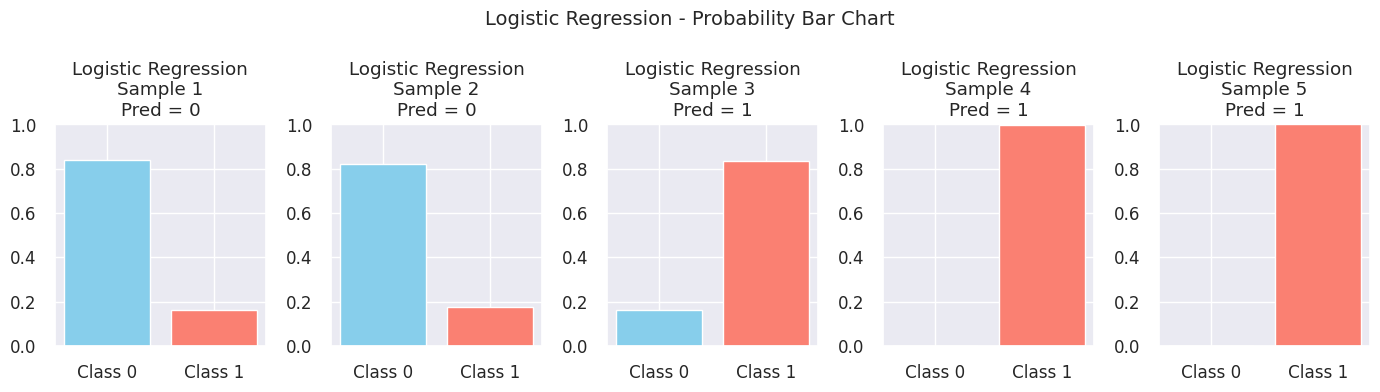

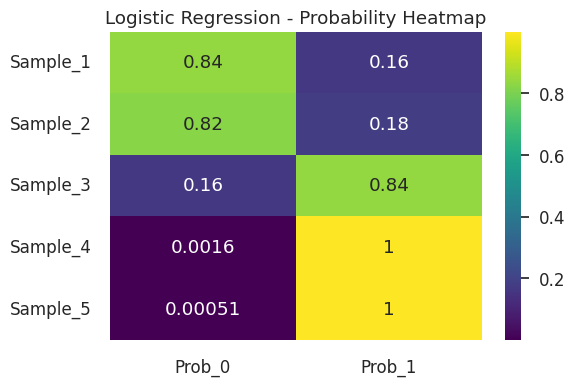

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




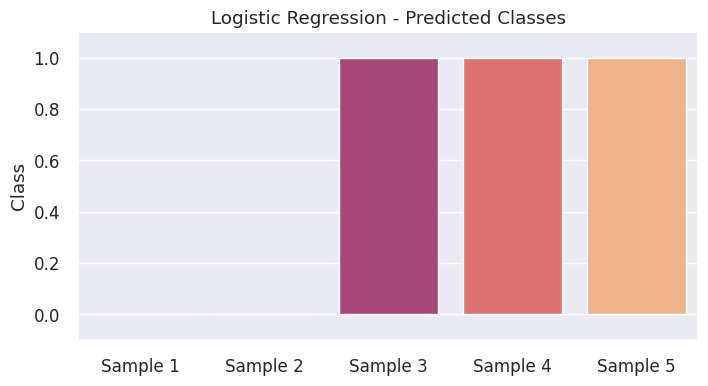

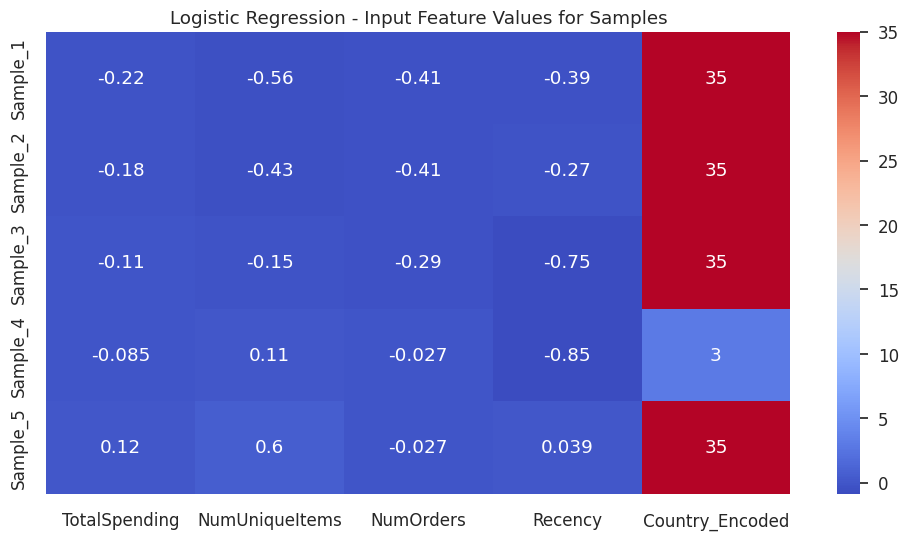



==== Visualizing Predictions for: Decision Tree ====


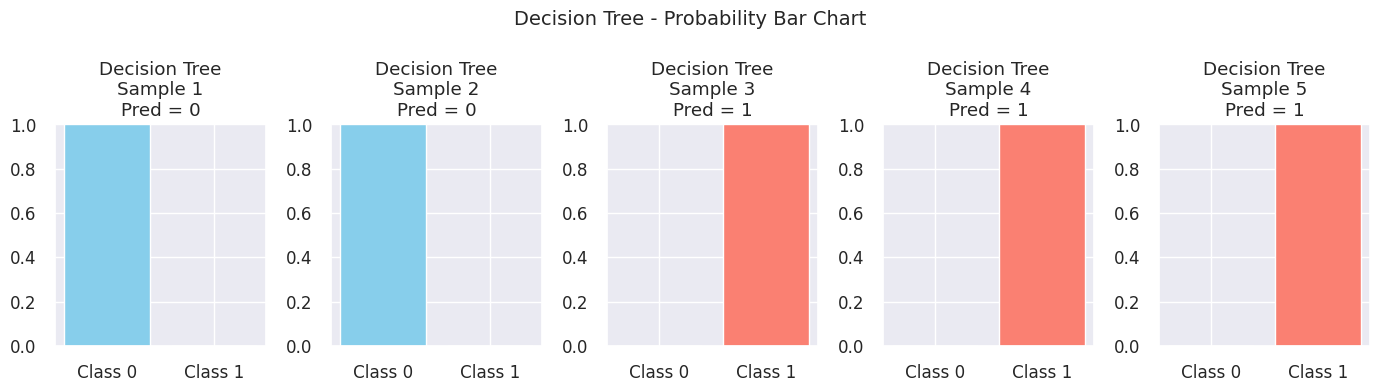

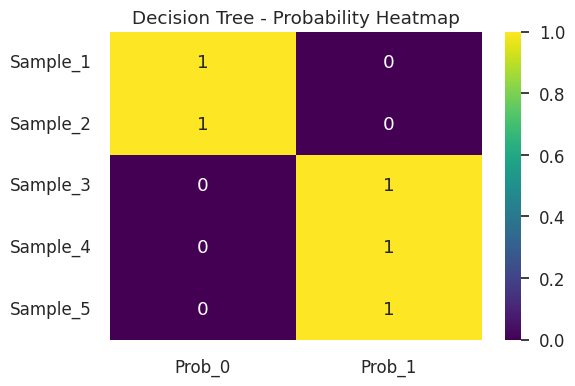

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




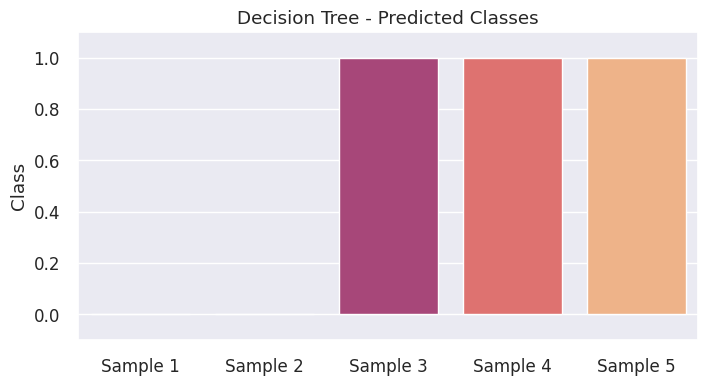

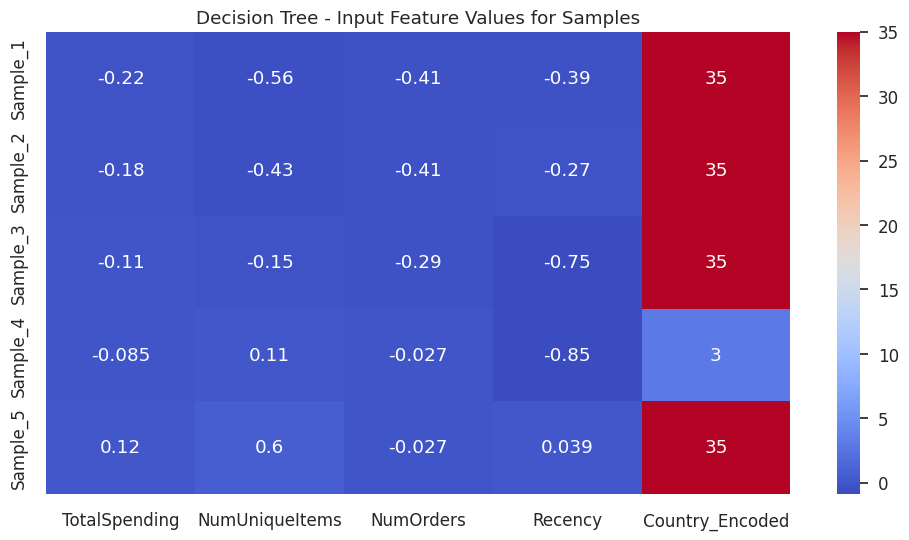



==== Visualizing Predictions for: Random Forest ====


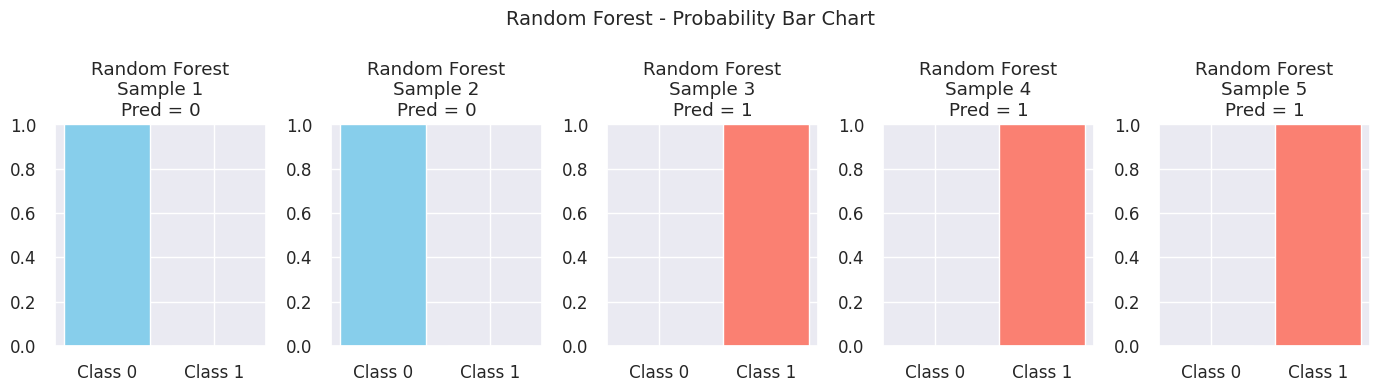

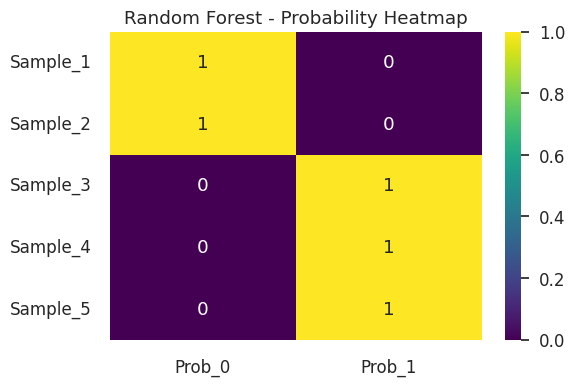

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




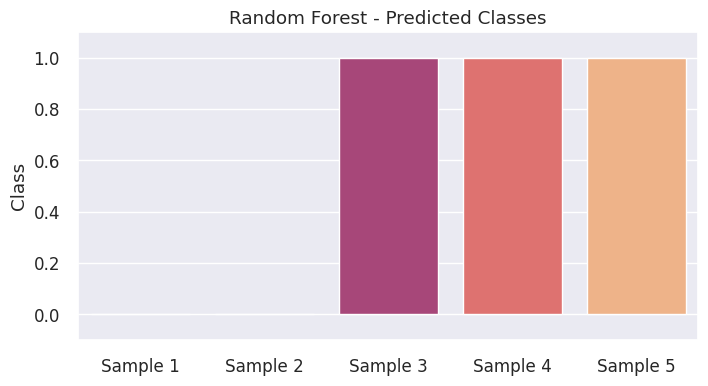

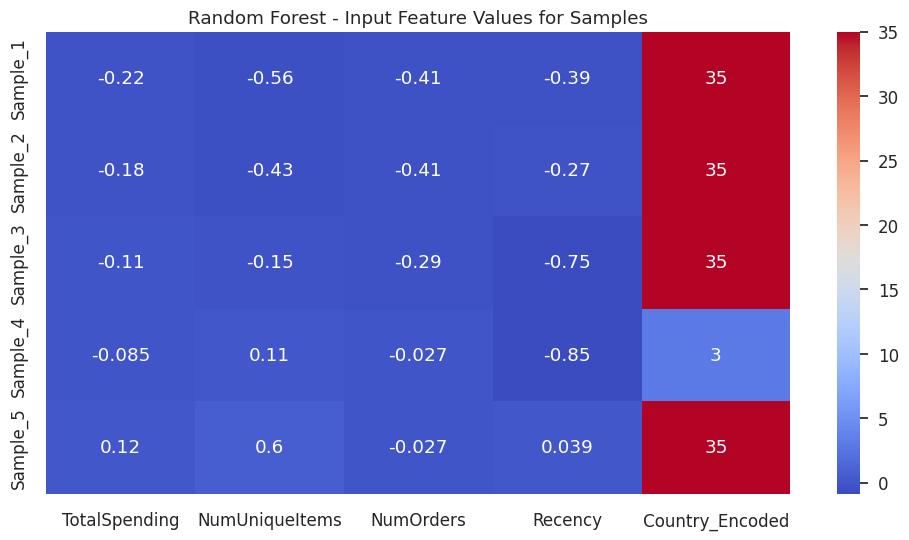



==== Visualizing Predictions for: K-Nearest Neighbors ====


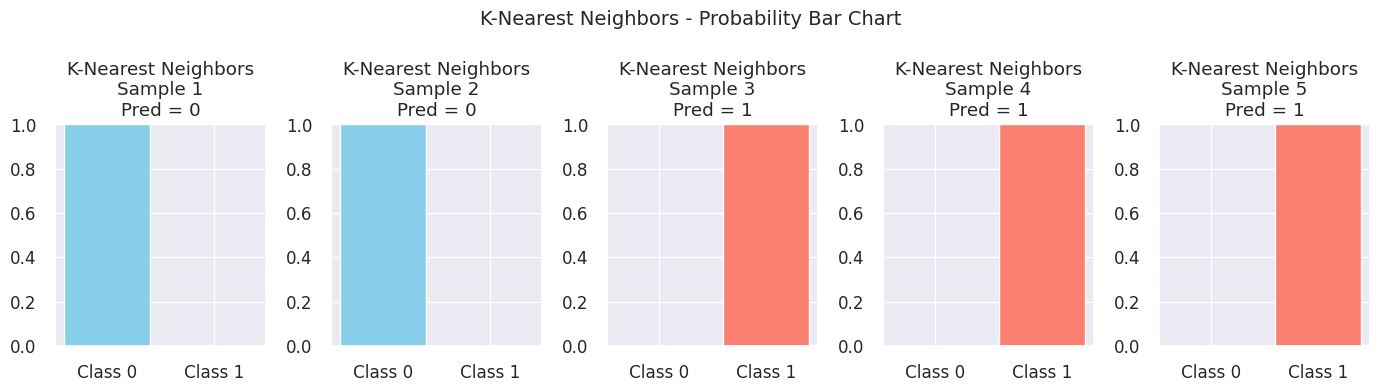

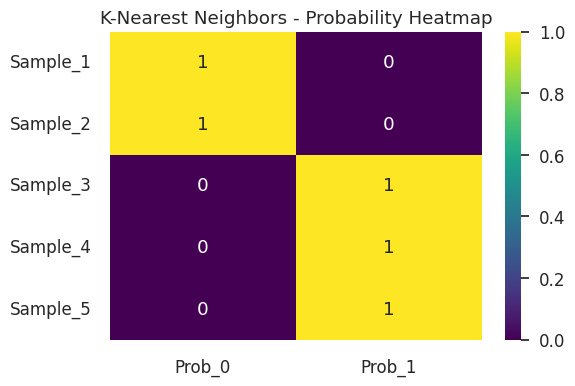

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




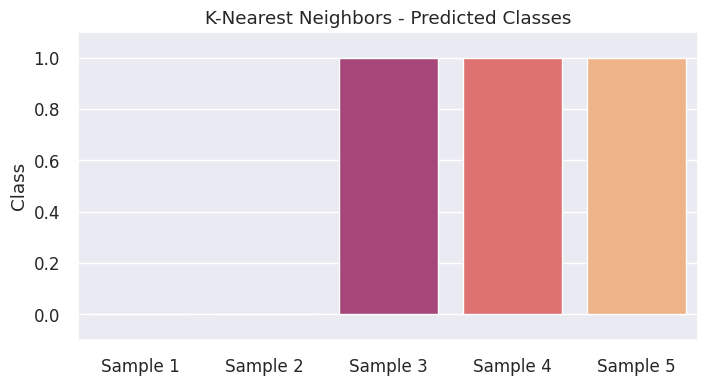

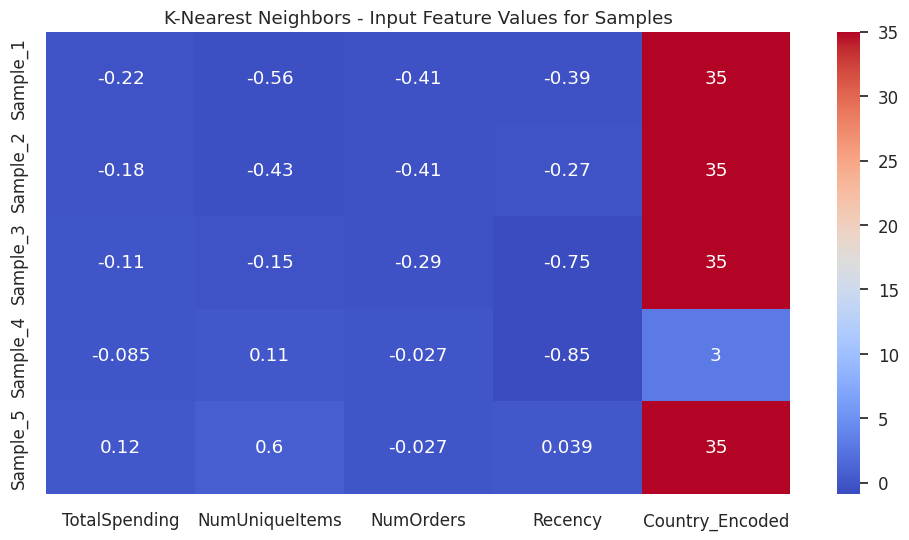



==== Visualizing Predictions for: Support Vector Machine ====


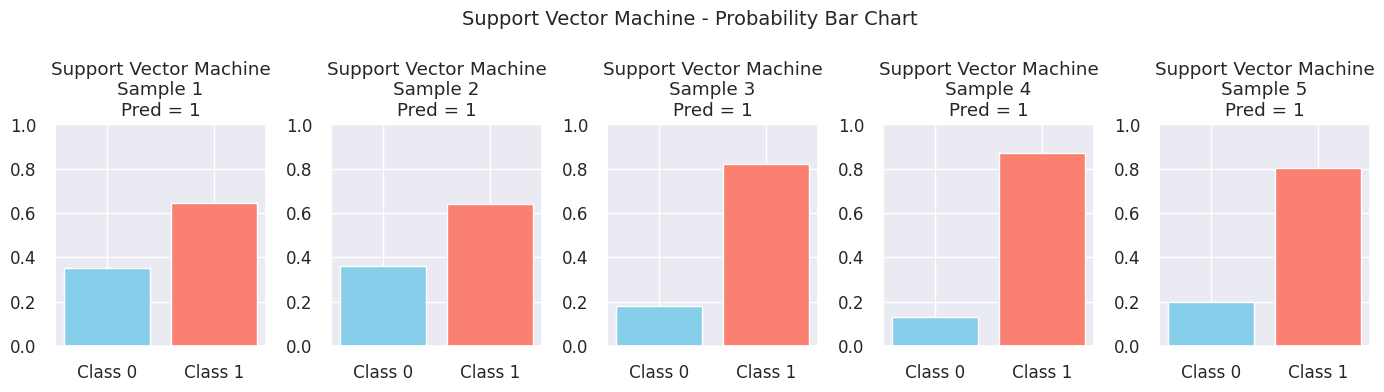

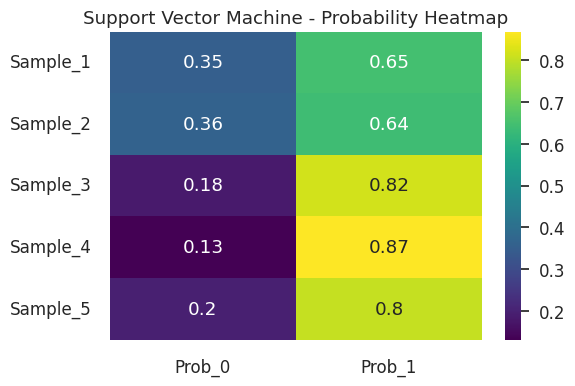

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




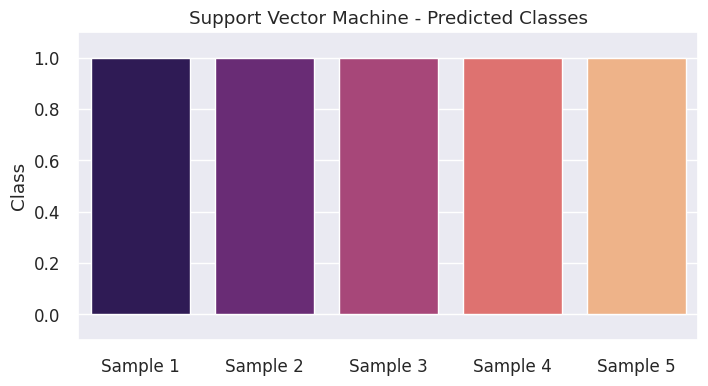

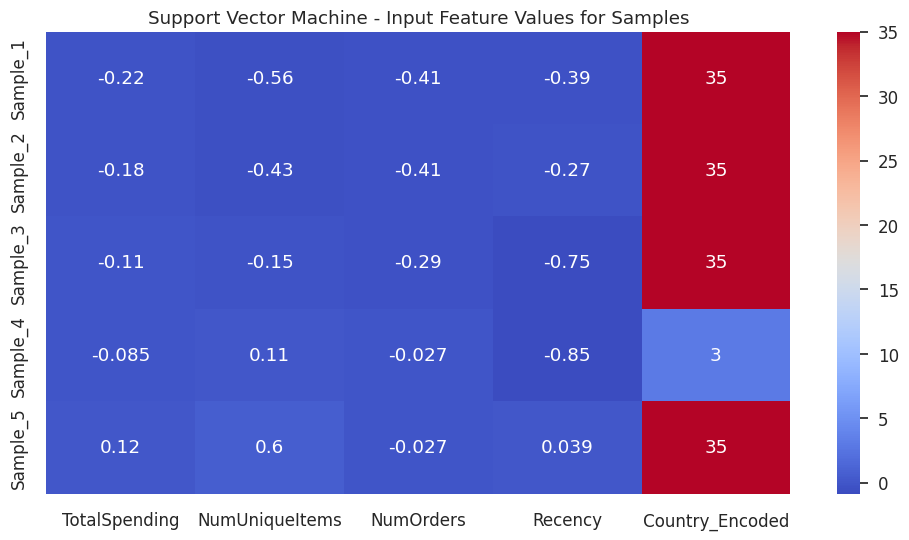



==== Visualizing Predictions for: AdaBoost ====


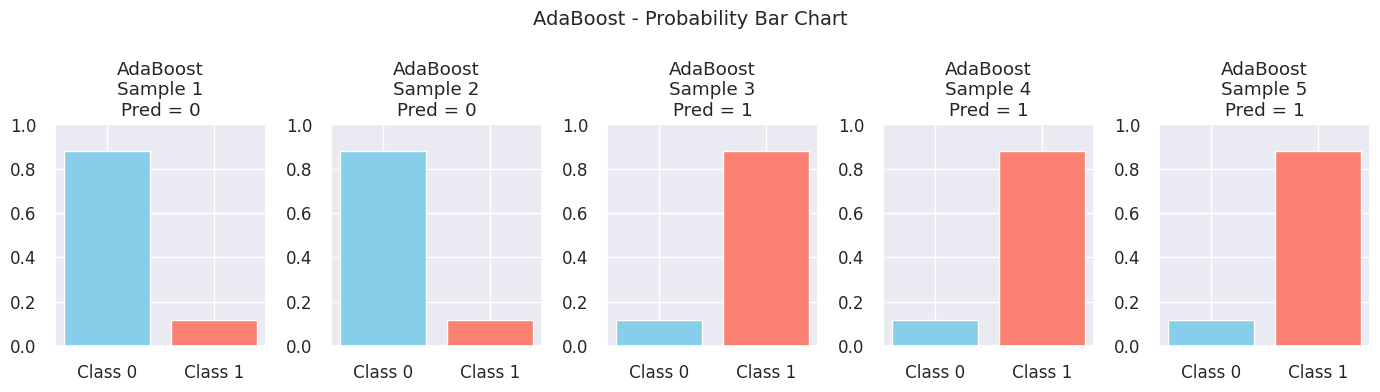

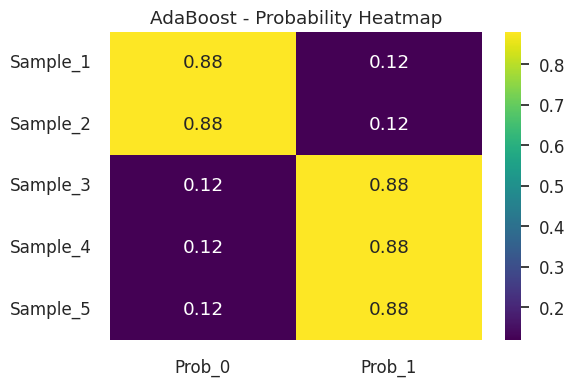

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




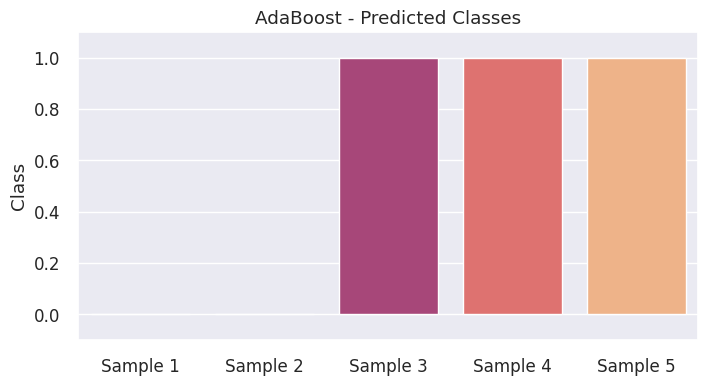

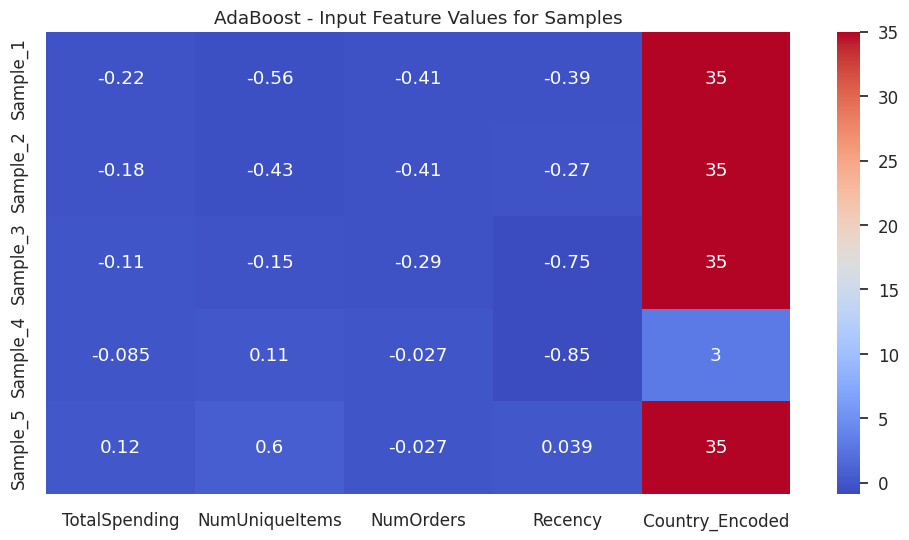



==== Visualizing Predictions for: Voting Classifier ====


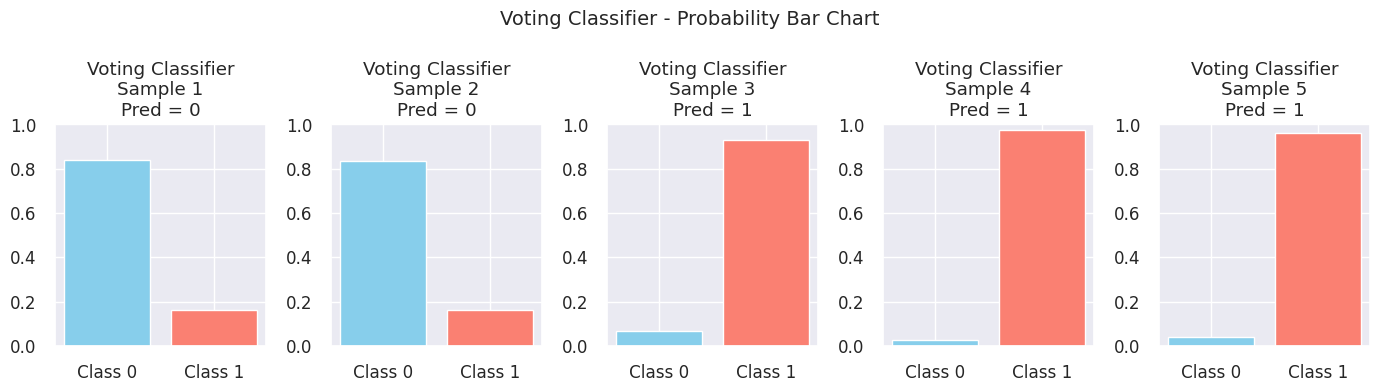

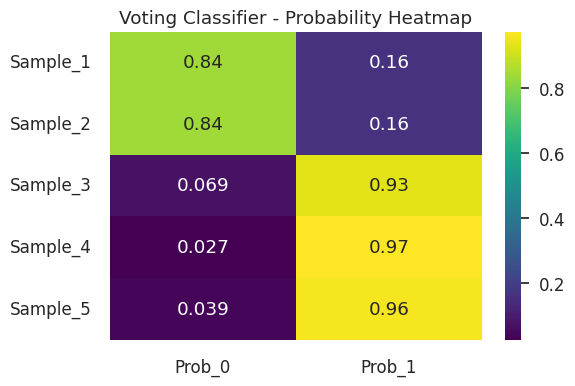

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




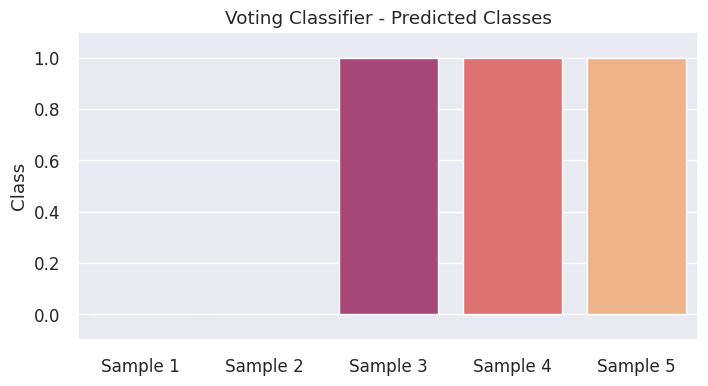

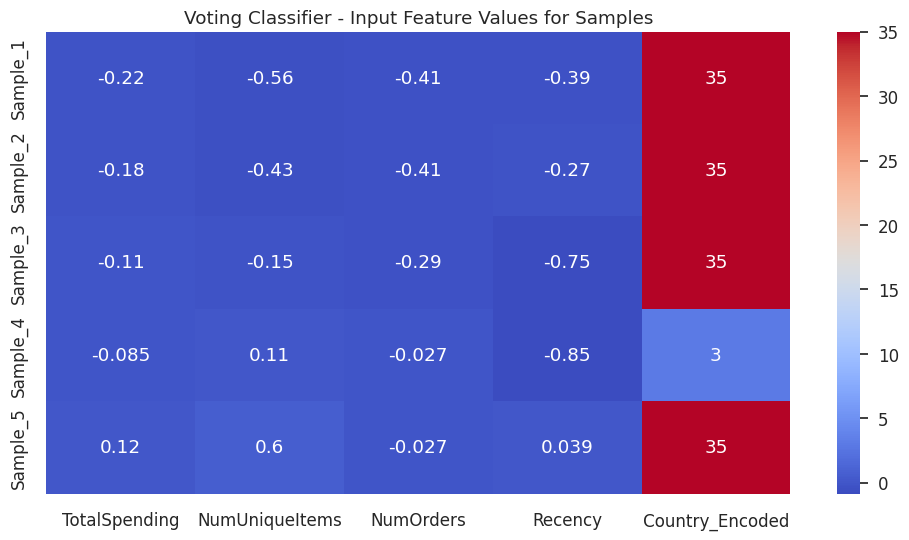



==== Visualizing Predictions for: Stacking Classifier ====


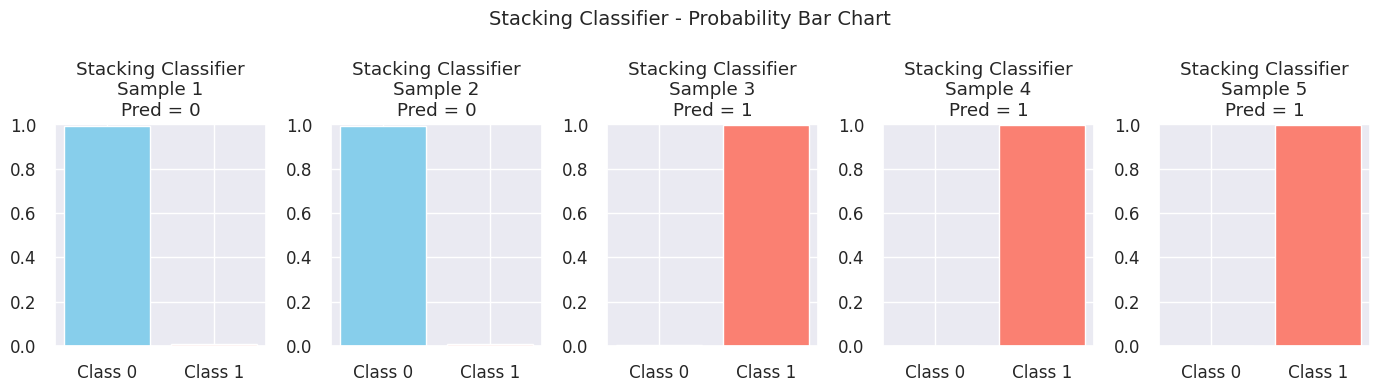

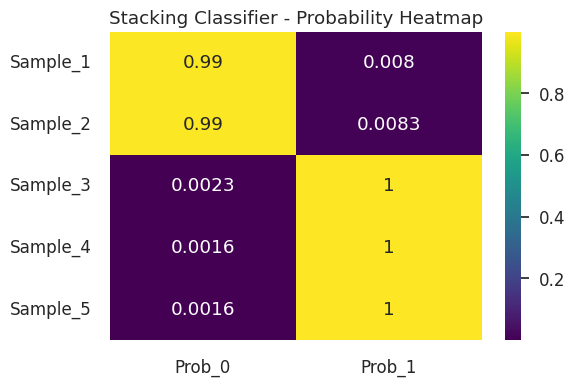

/tmp/ipython-input-173916604.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




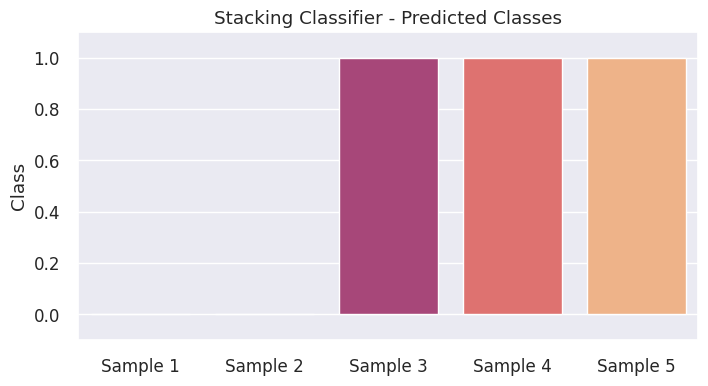

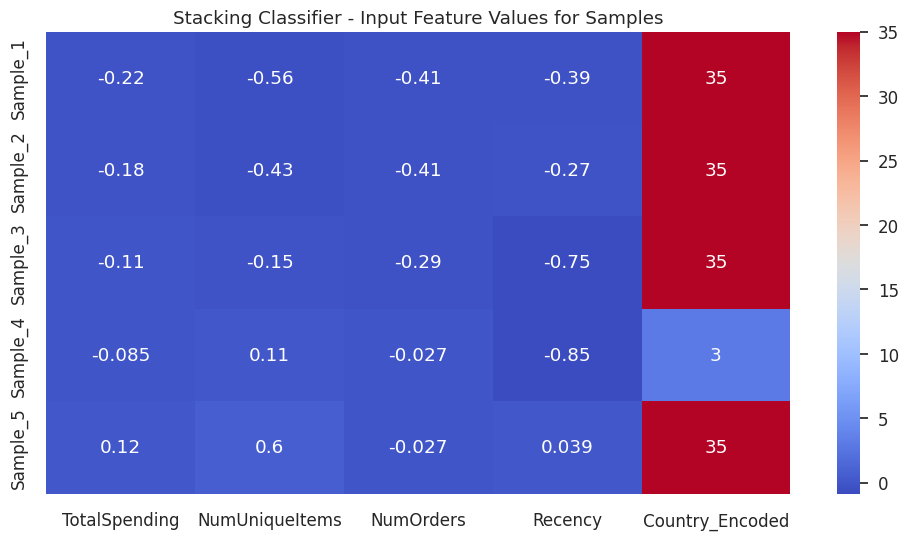

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Select any 5 samples from test set
samples = X_test_scaled[:5]
sample_features = pd.DataFrame(samples, columns=X.columns)
sample_features.index = [f"Sample_{i+1}" for i in range(samples.shape[0])]

# Ensure consistent figure style
plt.style.use('seaborn-v0_8')
sns.set(font_scale=1.1)

# ----- FUNCTION TO GENERATE VISUALS FOR A SINGLE MODEL -----

def visualize_model_predictions(model_name, model, samples):
    print(f"\n\n==== Visualizing Predictions for: {model_name} ====")

    # 1. Predictions & Probabilities
    preds = model.predict(samples)
    probs = model.predict_proba(samples)

    # -------------- 1. Probability Bar Charts -----------------
    plt.figure(figsize=(14,4))
    for i in range(samples.shape[0]):
        plt.subplot(1, samples.shape[0], i+1)
        plt.bar(["Class 0", "Class 1"], probs[i], color=["skyblue", "salmon"])
        plt.title(f"{model_name}\nSample {i+1}\nPred = {preds[i]}")
        plt.ylim(0,1)
    plt.suptitle(f"{model_name} - Probability Bar Chart", fontsize=14)
    plt.tight_layout()
    plt.show()

    # -------------- 2. Probability Heatmap -----------------
    prob_df = pd.DataFrame(probs, columns=["Prob_0", "Prob_1"])
    prob_df.index = [f"Sample_{i+1}" for i in range(samples.shape[0])]

    plt.figure(figsize=(6,4))
    sns.heatmap(prob_df, annot=True, cmap="viridis")
    plt.title(f"{model_name} - Probability Heatmap")
    plt.show()

    # -------------- 3. Predicted Class Bar Plot -----------------
    plt.figure(figsize=(8,4))
    sns.barplot(x=[f"Sample {i+1}" for i in range(samples.shape[0])],
                y=preds, palette="magma")
    plt.title(f"{model_name} - Predicted Classes")
    plt.ylabel("Class")
    plt.ylim(-0.1, 1.1)
    plt.show()

    # -------------- 4. Feature Heatmap for Input Samples -----------------
    plt.figure(figsize=(12,6))
    sns.heatmap(sample_features, annot=True, cmap="coolwarm")
    plt.title(f"{model_name} - Input Feature Values for Samples")
    plt.show()

# ----- LOOP THROUGH ALL MODELS -----

for model_name, model in all_models.items():
    visualize_model_predictions(model_name, model, samples)
